# Plot results
**Output:** Plots are displayed inline and saved to the `output_images` directory.

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import os


Created new directory: plots


In [ ]:
axis_align_exp = "./results/axis-alignment-experiments.csv"

mws_exp = "./results/mws-experiments.csv" 

OUTPUT_DIR = "./plots"

# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

Created output directory: ./plots


In [16]:
try:
    df1 = pd.read_csv(axis_align_exp)
    df1.name = "Experiment 1" # Give it a name for the legend
    print(f"Loaded {df1.name}: {df1.shape[0]} rows, {df1.shape[1]} columns")
    display(df1.head())

except FileNotFoundError as e:
    print(f"Error: Could not find file. Check your path.\nDetails: {e}")

Loaded Experiment 1: 30 rows, 18 columns


,Name,Created,Runtime,End Time,Notes,State,Tags,mws_batch_size,seed,TC,DKL,MI,analytical_cond_kl,joint_entropy,logpx,train_batch_size,MIG,batch_size
0,tcvae_seed39,2026-01-11T23:06:15.000Z,927,2026-01-11T23:21:42.000Z,-,finished,axisalignment-,NaN,39,0.248038,0.434438,9.612593,10.295071,13.745000,-77.420911,NaN,0.509699,1024
1,tcvae_seed38,2026-01-11T22:50:34.000Z,930,2026-01-11T23:06:04.000Z,-,finished,axisalignment-,NaN,38,0.119280,0.089014,8.504581,8.712876,14.183167,-99.478168,NaN,0.337470,1024
2,tcvae_seed37,2026-01-11T22:36:37.000Z,832,2026-01-11T22:50:29.000Z,-,finished,axisalignment-,NaN,37,0.083721,0.245834,8.785004,9.114558,14.051802,-93.755764,NaN,0.487595,1024
3,tcvae_seed36,2026-01-11T22:20:49.000Z,928,2026-01-11T22:36:17.000Z,-,finished,axisalignment-,NaN,36,0.085849,0.240729,8.768833,9.095411,14.016818,-94.082475,NaN,0.495839,1024
4,tcvae_seed35,2026-01-11T22:06:01.000Z,871,2026-01-11T22:20:32.000Z,-,finished,axisalignment-,NaN,35,0.266473,0.419225,9.746952,10.432650,13.682064,-76.764568,NaN,0.509140,1024


Pearson Correlation: -0.4618
Plot saved to: ./plots/comparison_plot.png


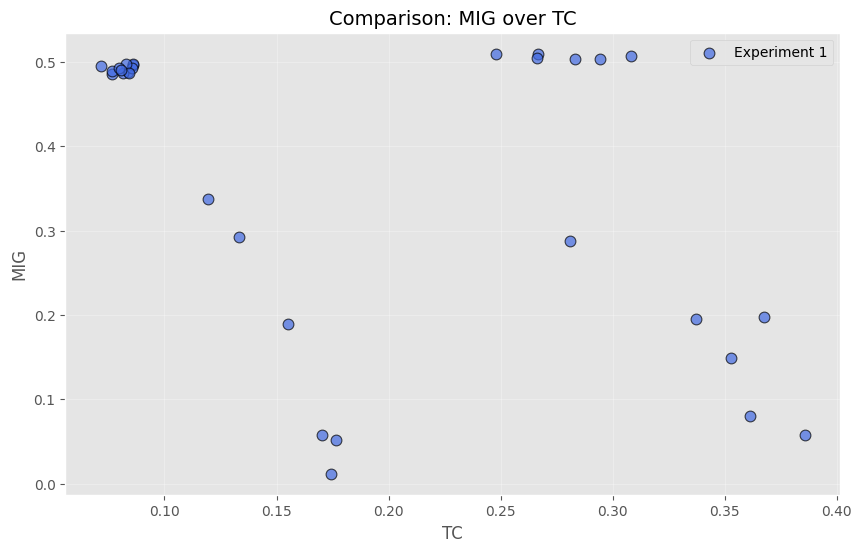

In [ ]:
x_col = 'TC'
y_col = 'MIG'

plt.figure(figsize=(10, 6))

if x_col in df1.columns and y_col in df1.columns:
    plt.scatter(
    df1[x_col], 
    df1[y_col], 
    alpha=0.7,
    s=60,
    c='royalblue',
    edgecolor='black',
    linewidth=0.8,
    label='Axis Alignment Experiment'
)
else:
    print(f"Warning: Columns '{x_col}' or '{y_col}' not found in File 1.")

correlation = df1['TC'].corr(df1['MIG'])
print(f"Pearson Correlation: {correlation:.4f}")

plt.title(f'Comparison: {y_col} over {x_col}', fontsize=14)
plt.xlabel(x_col, fontsize=12)
plt.ylabel(y_col, fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Save and Show
save_path = os.path.join(OUTPUT_DIR, 'comparison_plot.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {save_path}")

plt.show()